In [12]:
import pandas as pd

df = pd.read_csv("/content/sales_data_sample.csv",encoding="latin1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.shape

(2823, 25)

In [4]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [9]:
total_sales = df["SALES"].sum()
print("Total Sales:",total_sales)

Total Sales: 10032628.85


In [10]:
sales_by_year = df.groupby('YEAR_ID')["SALES"].sum()
print(sales_by_year)

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64


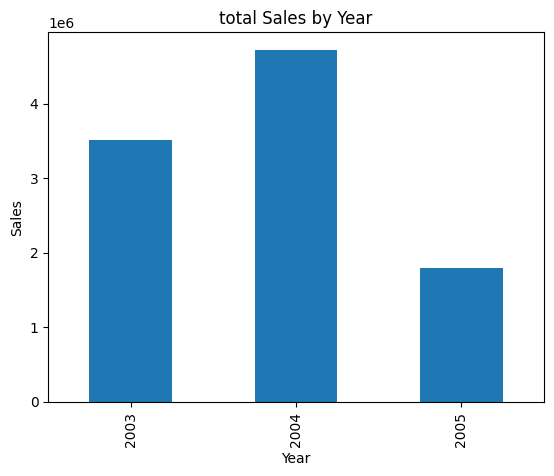

In [13]:
import matplotlib.pyplot as plt

sales_by_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("total Sales by Year")
plt.show()

In [14]:
sales_by_prodect = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)
print(sales_by_prodect)

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


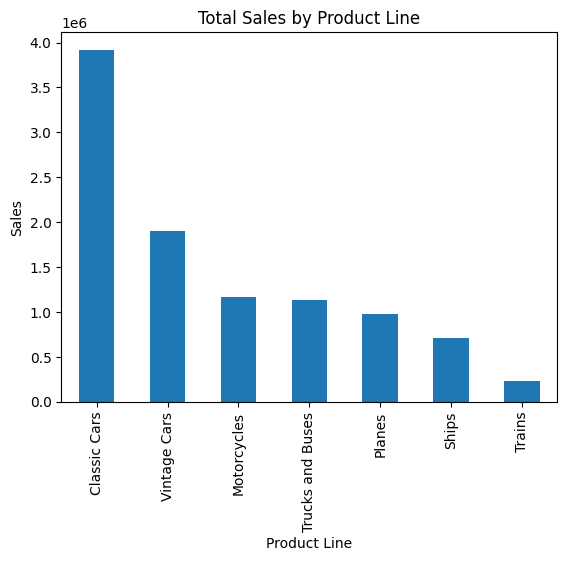

In [20]:
sales_by_prodect.plot(kind="bar")
plt.xlabel("Product Line")
plt.ylabel("Sales")
plt.title("Total Sales by Product Line")
plt.show()

In [21]:
sales_by_country = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False)
print(sales_by_country)

COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64


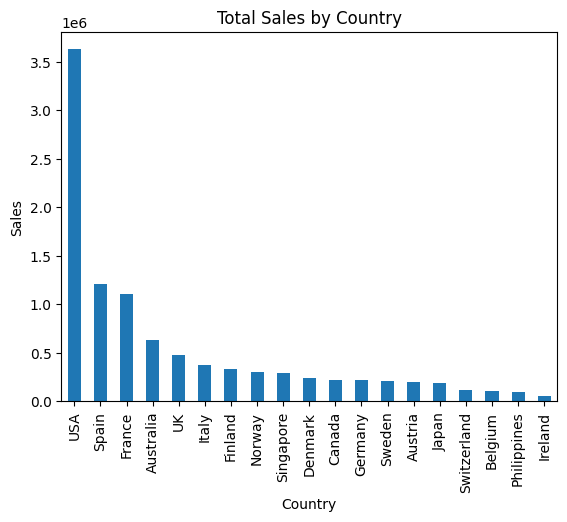

In [23]:
sales_by_country.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Total Sales by Country")
plt.show()

In [24]:
sales_by_month = df.groupby("MONTH_ID")["SALES"].sum().sort_index()
print(sales_by_month)

MONTH_ID
1      785874.44
2      810441.90
3      754501.39
4      669390.96
5      923972.56
6      454756.78
7      514875.97
8      659310.57
9      584724.27
10    1121215.22
11    2118885.67
12     634679.12
Name: SALES, dtype: float64


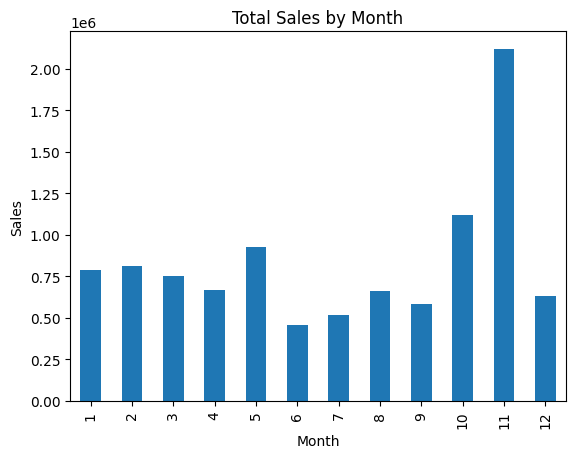

In [26]:
sales_by_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Total Sales by Month")
plt.show()

In [27]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors= "coerce")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [30]:
df["YEAR"] = df["ORDERDATE"].dt.year
df["MONTH"] = df["ORDERDATE"].dt.month
df["DAY"] = df["ORDERDATE"].dt.day

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [32]:
df.duplicated().sum()


np.int64(0)

In [33]:
df[df["QUANTITYORDERED"]<=0]


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR,MONTH,DAY


In [34]:
df[df["SALES"]<=0]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR,MONTH,DAY


In [35]:
df["CALC_SALES"] = df["QUANTITYORDERED"] * df["PRICEEACH"]

(df["SALES"] - df["CALC_SALES"]).abs().describe()

,0
count,2.823000e+03
mean,6.169827e+02
std,1.047729e+03
min,0.000000e+00
25%,0.000000e+00
50%,4.547474e-13
75%,9.251800e+02
max,7.536500e+03


Advanced Analysis

In [36]:
top_cosutomer = df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False)
print(top_cosutomer)

CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
                                  ...    
Royale Belge                     33440.10
Microscale Inc.                  33144.93
Auto-Moto Classics Inc.          26479.26
Atelier graphique                24179.96
Boards & Toys Co.                 9129.35
Name: SALES, Length: 92, dtype: float64


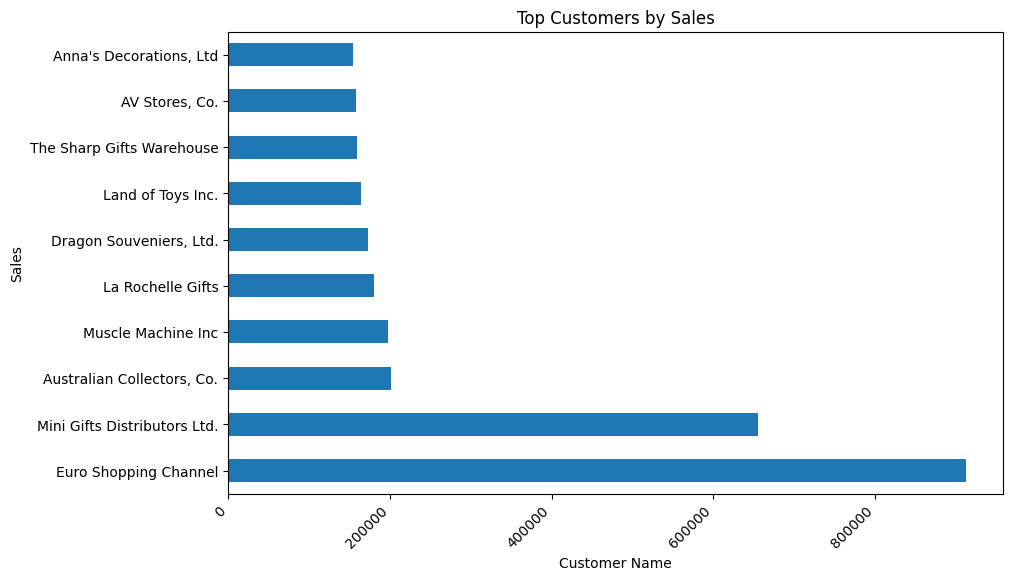

In [47]:
from matplotlib import figure
top_cosutomer = df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,6))
top_cosutomer.plot(kind="barh")
plt.xlabel("Customer Name")
plt.ylabel("Sales")
plt.title("Top Customers by Sales")
plt.xticks(rotation=45, ha="right")
plt.show()

In [48]:
sales_by_dealsize = df.groupby("DEALSIZE")["SALES"].sum()
print(sales_by_dealsize)

DEALSIZE
Large     1302119.26
Medium    6087432.24
Small     2643077.35
Name: SALES, dtype: float64


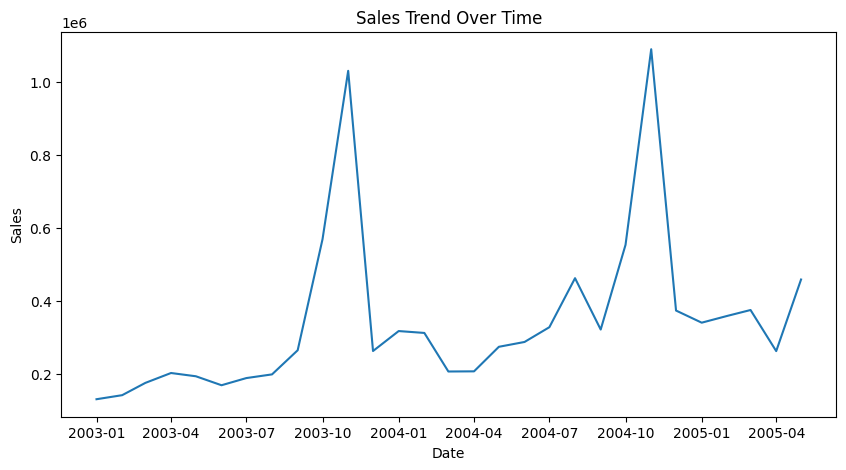

In [51]:
monthly_trend = (
    df.groupby(["YEAR","MONTH"])["SALES"].sum().
    reset_index()
)

monthly_trend["DATA"] = pd.to_datetime(
    monthly_trend["YEAR"].astype(str) + "-" +
    monthly_trend["MONTH"].astype(str) + "-01"
)
monthly_trend = monthly_trend.sort_values("DATA")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_trend["DATA"],monthly_trend["SALES"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.show()





machine

In [52]:
ml_df = df[[
    "QUANTITYORDERED",
    "PRICEEACH",
    "PRODUCTLINE",
    "COUNTRY",
    "DEALSIZE"
]].copy()

In [53]:
ml_df.head()

,QUANTITYORDERED,PRICEEACH,PRODUCTLINE,COUNTRY,DEALSIZE
0,30,95.70,Motorcycles,USA,Small
1,34,81.35,Motorcycles,France,Small
2,41,94.74,Motorcycles,France,Medium
3,45,83.26,Motorcycles,USA,Medium
4,49,100.00,Motorcycles,USA,Medium


In [55]:
from sklearn.preprocessing import LabelEncoder

le_productline = LabelEncoder()
le_country = LabelEncoder()
le_dealsize = LabelEncoder()

ml_df["PRODUCTLINE"] = le_productline.fit_transform(ml_df["PRODUCTLINE"])
ml_df["COUNTRY"] = le_country.fit_transform(ml_df["COUNTRY"])
ml_df["DEALSIZE"] = le_dealsize.fit_transform(ml_df["DEALSIZE"])







In [56]:
ml_df.head()

,QUANTITYORDERED,PRICEEACH,PRODUCTLINE,COUNTRY,DEALSIZE
0,30,95.70,1,18,2
1,34,81.35,1,6,2
2,41,94.74,1,6,1
3,45,83.26,1,18,1
4,49,100.00,1,18,1


In [57]:
from sklearn.model_selection import train_test_split

# فصل المدخلات عن الهدف
X = ml_df.drop("DEALSIZE", axis=1)
y = ml_df["DEALSIZE"]

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (2258, 4)
Testing size: (565, 4)


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# إنشاء النموذج
model = DecisionTreeClassifier(random_state=42)

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)


Model accuracy: 0.8601769911504424


In [59]:
# صفقة جديدة للتجربة
new_order = [[50, 95, 1, 18]]
# [QUANTITYORDERED, PRICEEACH, PRODUCTLINE, COUNTRY]

prediction = model.predict(new_order)

print("Predicted deal size:", prediction)

Predicted deal size: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [68]:
import pandas as pd

new_order = pd.DataFrame(
    [[50, 589,55, 18]],
    columns=["QUANTITYORDERED", "PRICEEACH", "PRODUCTLINE", "COUNTRY"]
)

prediction = model.predict(new_order)

print("Predicted deal size:", le_dealsize.inverse_transform(prediction))

Predicted deal size: ['Large']


تدريب جديد باستخدام الريفريشن

In [70]:
# تجهيز داتا جديدة للـ Regression
reg_df = df[[
    "QUANTITYORDERED",
    "PRICEEACH",
    "PRODUCTLINE",
    "COUNTRY",
    "SALES"
]].copy()

reg_df.head()


,QUANTITYORDERED,PRICEEACH,PRODUCTLINE,COUNTRY,SALES
0,30,95.70,Motorcycles,USA,2871.00
1,34,81.35,Motorcycles,France,2765.90
2,41,94.74,Motorcycles,France,3884.34
3,45,83.26,Motorcycles,USA,3746.70
4,49,100.00,Motorcycles,USA,5205.27


In [71]:
from sklearn.preprocessing import LabelEncoder

le_product = LabelEncoder()
le_country = LabelEncoder()

reg_df["PRODUCTLINE"] = le_product.fit_transform(reg_df["PRODUCTLINE"])
reg_df["COUNTRY"] = le_country.fit_transform(reg_df["COUNTRY"])

reg_df.head()


,QUANTITYORDERED,PRICEEACH,PRODUCTLINE,COUNTRY,SALES
0,30,95.70,1,18,2871.00
1,34,81.35,1,6,2765.90
2,41,94.74,1,6,3884.34
3,45,83.26,1,18,3746.70
4,49,100.00,1,18,5205.27


In [72]:
from sklearn.model_selection import train_test_split

# فصل المدخلات عن الهدف
X = reg_df.drop("SALES", axis=1)
y = reg_df["SALES"]

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (2258, 4)
Testing size: (565, 4)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# إنشاء النموذج
model = LinearRegression()

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# حساب الأخطاء
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 763.2721701874492
R2 Score: 0.6912005244527122


In [74]:
import pandas as pd

new_order = pd.DataFrame(
    [[50, 95, 1, 18]],
    columns=["QUANTITYORDERED", "PRICEEACH", "PRODUCTLINE", "COUNTRY"]
)

predicted_sales = model.predict(new_order)
print("Predicted sales:", predicted_sales[0])


Predicted sales: 5764.871268336739
